<a href="https://colab.research.google.com/github/thuhuong205201/Machine_learing/blob/main/Hw_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


1. Tự biến đổi lại thuật toán logistic regression, từ xây dựng công thức, likelihood, maximize likelihood, đạo làm negative log likelihood theo ma trận hệ số.



The model Logistic Regression:
$$P(C_1|\phi) = y(\phi) = \sigma (w^T\phi)$$ 

$$ P(C_2 | \phi) = 1 - P(C_1|\phi) $$

For a data set $\phi_n, t_n$ where $t_n \in \{0,1\} $ and $ \phi_n = \phi(X_n), $ with n = 1,...,N, the likelihood function can be written

$$ p(t|w) = \prod_{n=1}^N y^{t_n}_n ( 1 - y_n) ^{1-t_n} $$

$ where:  \ t = (t_1, ..., t_N)^T \ and \ y_n = p(C_1 | \phi_n) $
We have Loss function:
$$ L = -log p(t|w) = - \sum_{n=1}^N \{ t_n log y_n + (1 - t_n) log(1 - y_n)\} $$

Where $ y_n = \sigma (a_n) \ and \ a_n = w^T \phi_n $

Chain rule:

$$ \frac{\partial \mathcal{L}}{\partial w_0} =\frac{\partial \mathcal{L}} {\partial y_n} .\frac{\partial y_n} {\partial a_n} .\frac{\partial a_n}{\partial w_0}  $$

$$ = -(\frac{t_n}{y_n} - \frac{1-t_n}{1 - y_n} ) . y_n(1 - y_n) . 1 $$


$$=-[t_n(1-y_n)-y_n(1-t_n)]$$ 
$$= y_n - t_n$$ 
$$\dfrac{\partial L}{\partial w_1} = \dfrac{\partial L}{\partial y_n}.\dfrac{\partial y_n}{\partial a_n}.\dfrac{\partial a_n}{\partial w_1} $$ 
$$= - [ (\dfrac{t_n}{y_n} - \dfrac{1-t_n}{1-y_n}).y_n(1-y_n).\phi_1] $$ 
$$=-[t_n(1-y_n)-y_n(1-t_n)].\phi_1$$ 
$$= (y_n - t_n)\phi_1$$ 
$$\Rightarrow \dfrac{\partial L}{\partial w} = \dfrac{1}{N} \phi^T(y_n-t_n) $$



2. Tìm hàm f(x), biết f'(x) = f(x)(1-f(x))

$$ f'(x) = f(x)(1-f(x))  $$
$$ \Leftrightarrow \frac{d f(x)}{dx} =  f(x)(1-f(x)) $$
$$ \Leftrightarrow \frac{d f(x)}{f(x)(1-f(x))} = dx  $$
$$ \Leftrightarrow \int\frac{d f(x)}{f(x)(1-f(x))} = \int dx  $$
$$ \Leftrightarrow \int [\frac{1}{f(x)}+ \frac{1}{1-f(x)}]df(x) = \int dx  $$
$$ \Leftrightarrow ln |f(x)| - ln|1-f(x)| = x + C  $$
$$ \Leftrightarrow ln| \frac{f(x)}{1 - f(x)} | = x+ c $$
$$ \Leftrightarrow \frac{f(x)}{1 - f(x)} = e^{x+C} $$
$$ \Leftrightarrow \frac{-(1 - f(x)) +1}{1 - f(x)} = e^{x+C} $$
$$ \Leftrightarrow -1 +  \frac{1}{1 - f(x)} = e^{x+C} $$
$$ \Leftrightarrow \frac{1}{1 - f(x)} =1 + e^{x+C}  $$
$$ \rightarrow f(x) = \frac{e^{x+C}}{1 + e^{x+C}}$$


3. Dùng thuật toán gradient descent tối ưu hàm f(x) = x^2, với giá trị khởi tạo x = 2 và thử các learning rate khác nhau (0.2, 1, 2), vẽ đồ thị hàm loss để hiện sự thay đổi hàm f(x) sau các bước update.

LR =  0.2


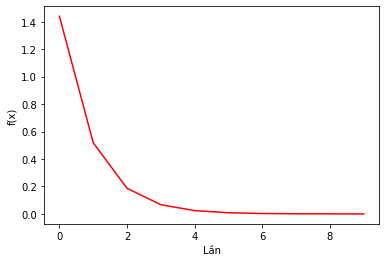

LR =  1


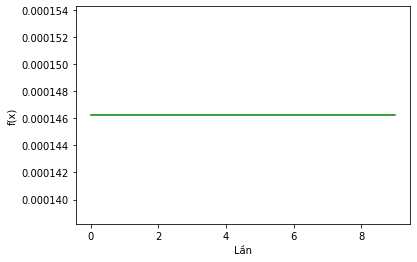

LR =  2


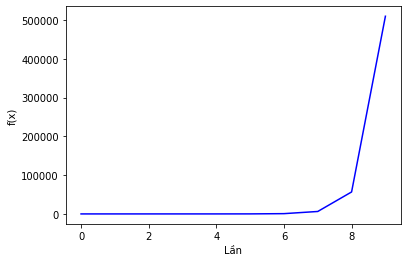

In [3]:
learning_rate = [0.2, 1, 2]
x = 2
c = ['r', 'g', 'b']
for i, lr in enumerate(learning_rate):
  a = []
  for j in range(10):
    x = x - lr*2*x
    a.append(x**2)
  print("LR = ", lr)
  plt.plot(a, color = c[i])
  plt.xlabel("Lần")
  plt.ylabel("f(x)")
  plt.show()

4. Dùng thuật toán logistic regression phân loại hồ sơ cho vay hay không với dữ liệu ở đây (https://github.com/nttuan8/DL_Tutorial/blob/master/L2/dataset.csv), input là lương, thời gian làm việc, output là cho vay hay không.
 a. xây dựng model, tìm tham số.

 b. dự đoán với các hồ sơ sau: (lương 2, thời gian: 3), (lương: 1, thời gian: 8), (lương: 5, thời gian: 5).

In [32]:
def sigmoid(x):
  return 1/ (1 + np.exp(-x))

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/nttuan8/DL_Tutorial/master/L2/dataset.csv').values
data

In [34]:
row, col = data.shape

In [ ]:
x = data[:, : 2].reshape(-1,col - 1)
y = data[:,-1].reshape(-1, 1)
x

In [ ]:
cho_x_vay = x[y[:,0]==1]
no_x_vay  = x[y[:,0]==0]
cho_x_vay

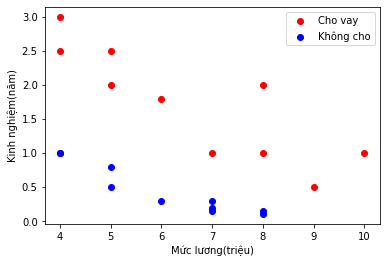

In [37]:
plt.scatter(cho_x_vay[:, 0], cho_x_vay[:,1], c = 'r', label='Cho vay')
plt.scatter(no_x_vay[:, 0], no_x_vay[:,1], c = 'b', label='Không cho')
plt.xlabel('Mức lương(triệu)')
plt.ylabel("Kinh nghiệm(năm)")
plt.legend()


In [38]:
x = np.hstack((np.ones((row, 1)), x))
w = np.array([0.,1,1]).reshape(-1,1)

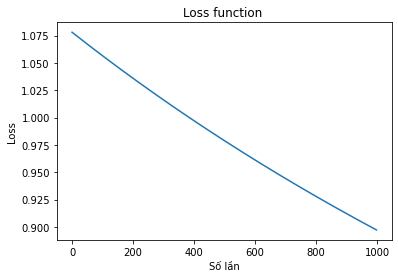

In [43]:
Iteration = 1000
loss = []
learning_rate = 0.01
for i in range(1,Iteration): 
    y_pre = sigmoid(np.dot(x, w))
    L = -np.sum(np.multiply(y, np.log(y_pre)) + np.multiply(1-y, np.log(1-y_pre)))
    w = w - learning_rate * np.dot(x.T, y_pre-y)
    loss.append(L)
plt.plot(loss)
plt.title("Loss function ")
plt.xlabel("Số lần")
plt.ylabel("Loss")
plt.show()

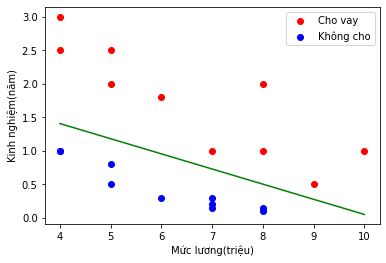

In [46]:
t = 0.5
plt.scatter(cho_x_vay[:,0], cho_x_vay[:,1], c = 'r', label='Cho vay')
plt.scatter(no_x_vay[:,0], no_x_vay[:,1], c='b', label="Không cho")
plt.plot((4, 10),(-(w[0]+4*w[1]+ np.log(1/t-1))/w[2], -(w[0] + 10*w[1]+ np.log(1/t-1))/w[2]), 'g')
plt.xlabel('Mức lương(triệu)')
plt.ylabel("Kinh nghiệm(năm)")
plt.legend()

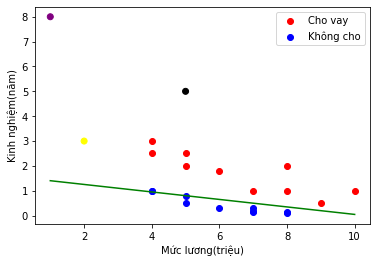

In [53]:
salary = [2, 1, 5]
year = [3, 8, 5]
co = ['yellow', 'purple', 'black']
t = 0.5
plt.scatter(cho_x_vay[:,0], cho_x_vay[:,1], c = 'r', label='Cho vay')
plt.scatter(no_x_vay[:,0], no_x_vay[:,1], c='b', label="Không cho")
plt.scatter(salary, year, c = co)
plt.xlabel('Mức lương(triệu)')
plt.ylabel("Kinh nghiệm(năm)")
plt.legend()
plt.plot((1, 10),(-(w[0]+4*w[1]+ np.log(1/t-1))/w[2], -(w[0] + 10*w[1]+ np.log(1/t-1))/w[2]), 'g')
plt.show()
